<p></p>

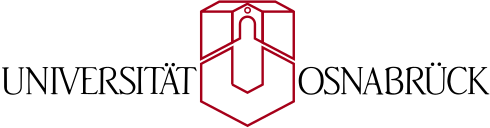
# <center>Einführung in die Künstliche Intelligenz</center> <a class="tocSkip">
### <center>Wintersemester 2020/21</center> <a class="tocSkip">
<center>Prof. Dr. Joachim Hertzberg, Felix Igelbrink, Alexander Mock</center>

# Übungsblatt 3: Constraint Satisfaction Problems

## Aufgabe: Constraint Satisfaction

Constraint Satsfaction erlaubt das Folgern und Ableiten von Zuweisungen an Variablen, die konsistent bzw.
inkonsistent mit den Bedingungen (constraints) der Zielkonfiguration sind. Die Bedingungen werden durch
Gleichungen und Ungleichungen repräsentiert. Zwei Constraint Propagation Methoden sollen im Folgen-
den untersucht werden: Backtracking und arc consistency. Die Verfahren unterscheiden sich bezüglich ihrer
Vollständigkeit der Inferenz und ihres Rechenaufwandes.

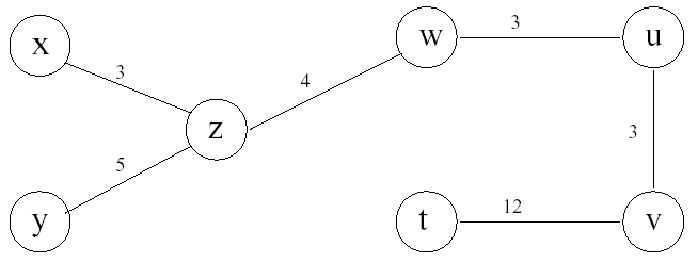

Betrachten Sie nun obiges Constraintnetz. Jeder Knoten stellt eine Variable dar und jede Kante (arc) ist
mit einer Zahl beschriftet. Die Variablen können nur Zahlen zwischen $0$ und $9$ annehmen (inklusive $0$ und
$9$). Jede Kante repräsentiert eine Bedingung, die die beiden durch die Kante verbundenen Variablen erfüllen
müssen. Die Bedingung besteht darin, dass jede Variable den gleichen Wert modulo der Kantenzahl haben
muss. Zum Beispiel repräsentiert die Kante $(x, z)$ mit dem Wert $3$ die Bedingung: $x$ mod $3$ = $z$ mod $3$ .
Sie kann erfüllt werden durch die Zuweisungen $x = 2$, $z = 2$, oder $x = 5$, $z = 2$ oder $x = 7$, $z = 1$.
Für obigen Graphen seien die Belegungen $x = 2$, $y = 0$ und $t = 0$ bereits vorhanden. 


### 
Geben Sie die Variablenbelegungen für *backtracking* an.

Reihenfolge: <v,u,w,z> mit Variablenbelegung <0,1,2,.....,9>

z = 5
w = 9
u = 0
v = 0


### 
Geben Sie die Variablenbelegungen für *arc consistency* an.

z = 5
w = 9
u = [0 or 3 or 6 or 9]
v = 0

## Programmieraufgabe: CSP-Solver

In dieser Aufgabe werden Sie einen einfachen CSP-Solver selbst in Python implementieren. Dazu steht Ihnen unten erneut eine Programmiervorlage zur Verfügung. Diese Implementiert unter anderem eine Problemrepräsentation sowie eine Basisklasse für die von Ihnen zu implementierenden Constaints.

*Hinweis*: Um die benötigten Datentypen besser zu visualisieren, haben wir hier *Type-Hints* verwendet, welche die Funktionsparameter und Variablen mit Typbezeichnungen versehen. Diese werden, anders als in Sprachen wie C++ oder Java **nicht** vom Python-Interpreter erzwungen, können aber als Hinweise dienen, welche Parameter hier übergeben werden sollen.


In [1]:
from typing import Generic, TypeVar, Dict, List, Optional
from abc import ABC, abstractmethod

# Type hints
V = TypeVar('V') # variable type (any object)
D = TypeVar('D') # domain type (any object)
  
  
class Constraint(Generic[V, D], ABC):
    """
    Base class for all constraints
    """
    def __init__(self, variables: List[V]) -> None:
        """
        Init the Constraint with the Variables it's between
        """
        self.variables = variables
  
    @abstractmethod
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        """
        Must be overridden by subclasses
        """
        


class CSP(Generic[V, D], ABC):
    """
    Class representing a constraint satisfaction problem.
    A constraint satisfaction problem consists of variables of type V
    that have ranges of values known as domains of type D and constraints
    that determine whether a particular variable's domain selection is valid
    """
    def __init__(self, variables: List[V], domains: Dict[V, List[D]]) -> None:
        # list of variables to be constrained
        self.variables: List[V] = variables 
        # domain of each variable
        self.domains: Dict[V, List[D]] = domains 
        self.constraints: Dict[V, List[Constraint[V, D]]] = {}
        for variable in self.variables:
            self.constraints[variable] = []
            if variable not in self.domains:
                raise LookupError("Every variable should have a domain assigned to it.")
  
    def add_constraint(self, constraint: Constraint[V, D]) -> None:
        for variable in constraint.variables:
            if variable not in self.variables:
                raise LookupError("Variable in constraint not in CSP")
            else:
                self.constraints[variable].append(constraint)
                
    def consistent(self, variable: V, assignment: Dict[V, D]) -> bool:
        """
        Check if the value assignment is consistent by checking all constraints
        for the given variable against it
        """
        for constraint in self.constraints[variable]:
            if not constraint.satisfied(assignment):
                return False
        return True
    
    @abstractmethod
    def solve(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        """
        Abstract method to solve the CSP. Must be implemented by subclasses.
        
        assignment is an optional partial assignment of the variables used for recursion is required.
        """


### 
Implementieren zunächst Sie eine `Constraint`-Subklasse für das in der Vorlesung behandelte Färbeproblem.
<div>
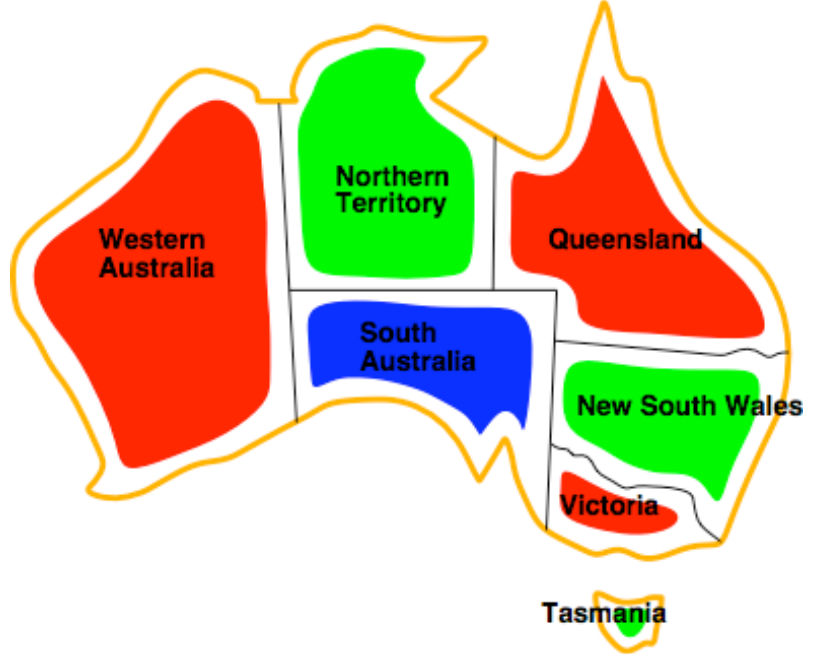 
</div>

Ihre Subklasse sollte dazu von der Klasse `Constraint` erben und die abstrakte Methode `satisfied` implementieren.

*Hinweis*: durch Aufruf von `super()` können Sie auf Methoden der Oberklasse zugreifen. Dieses ist inbesondere wichtig, um den Konstruktor (`__init__`) der Basisklasse aufzurufen (Beispiel: `super().__init__(variables)`)

In [2]:
class ColouringConstraint(Constraint):
    
    def __init__(self, variables):
      
        super().__init__(variables)
        
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        
        satisfied = False
        
        # Constraint bildet eine Kante ab, eine Kante existiert zwischen genau zwei Knoten
        if assignment[self.variables[0]] != assignment[self.variables[1]]:
            satisfied = True
        
        return satisfied
                

### 
Implementieren Sie nun einen Solver, der das Färbeproblem mittels Backtracking löst. Die entsprechende Subklasse ist unten bereits vordefiniert. Sie müssen die Implementation der Methode `solve` vervollständigen.  

In [3]:
class BacktrackingCSP(CSP):
    
    def __init__(self, variables, domains):
      
        super().__init__(variables, domains)
    
    def solve(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:
        
        # Rekursionsanker
        finished = True
        
        # Am Ende soll jeder Variable ein Wert zugewiesen worden sein, bis dahin freie Variablen suchen
        for variable in assignment:
            if not assignment[variable] or assignment[variable] == 0:
                finished = False
                var = variable
                break 
        
        # Jede Variable hat einen Wert erhalten und alle Constraints sind dabei erfüllt --> Lösung gefunden
        if finished:
            return assignment
        else:
            # Belegung für freie Variable suchen, sodass alle Constraints erfüllt sind
            for value in self.domains[var]:
                assignment[var] = value 
                if self.consistent(var, assignment):
                    result = self.solve(assignment)
                    if result != False:
                        return result
            assignment[var] = 0
            
        return False
        

### 
Implementieren Sie nun das Färbeproblem mit Ihrer Constraint-Klasse und nutzen Sie Ihren Solver um das Problem zu lösen.

In [4]:
variables: List[str] = ["Western Australia", "Northern Territory", "South Australia",
                         "Queensland", "New South Wales", "Victoria", "Tasmania"]
domains: Dict[str, List[str]] = {"Western Australia": ["green", "blue", "red"], "Northern Territory": ["green", "blue", "red"], "South Australia": ["green", "blue", "red"], "Queensland": ["green", "blue", "red"], "New South Wales": ["green", "blue", "red"], "Victoria": ["green", "blue", "red"], "Tasmania": ["green", "blue", "red"]}

australia = BacktrackingCSP(variables, domains)
australia.add_constraint(ColouringConstraint([variables[0], variables[1]]))
australia.add_constraint(ColouringConstraint([variables[0], variables[2]]))
australia.add_constraint(ColouringConstraint([variables[1], variables[2]]))
australia.add_constraint(ColouringConstraint([variables[1], variables[3]]))
australia.add_constraint(ColouringConstraint([variables[2], variables[3]]))
australia.add_constraint(ColouringConstraint([variables[2], variables[4]]))
australia.add_constraint(ColouringConstraint([variables[2], variables[5]]))
australia.add_constraint(ColouringConstraint([variables[3], variables[4]]))
australia.add_constraint(ColouringConstraint([variables[4], variables[5]]))

assignment = {"Western Australia": [], "Northern Territory": [], "South Australia": [], "Queensland": [], "New South Wales": [], "Victoria": [], "Tasmania": []}
australia.solve(assignment)

{'Western Australia': 'green',
 'Northern Territory': 'blue',
 'South Australia': 'red',
 'Queensland': 'green',
 'New South Wales': 'blue',
 'Victoria': 'green',
 'Tasmania': 'green'}

## Programmieraufgabe: Sudoku

Nutzen Sie Ihren CSP-Solver um das Spiel [Sudoku](https://de.wikipedia.org/wiki/Sudoku) zu lösen. Einen Zufallsgenerator für Sudokus können Sie mit dem Kommando

```bash
conda install pip
pip install sudokugen 
```

installieren und wie unten gegeben benutzen.

### 
Gegeben sei zunächst folgendes Sudoku-Feld:
```
 |1 3 5 | 7 9 2 | 4 6 8|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |------|-------|------|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |------|-------|------|
 |0 0 0 | 0 0 0 | 0 0 0|
 |0 0 0 | 0 0 0 | 0 0 0|
 |2 4 6 | 8 1 2 | 5 7 9|
```

Wir suchen nach einer Lösung. Wie hoch ist der erste Verzweigungsfaktor im Suchbaum?

Verzweigungsfaktor 9, maximale Baumtiefe wäre dann 63 (7 * 9).

In diesem Fall würde das Spielfeld durchnummeriert und Ebene 1 wäre Feld 1, Ebene 2 Feld 2, Ebene 3 Feld 3 usw. Jedes Feld kann die Zahlen 1-9 annehmen, daher Verzweigungsfaktor 9. 

In [11]:
import numpy as np
from sudokugen.generator import generate, Difficulty

#level = Difficulty.EASY
#level = Difficulty.MEDIUM
level = Difficulty.HARD

(A,B) = generate(difficulty=level)
board = np.array(A).reshape(9,9)
solution = np.array(B)

print('Board:')
print(board)
print('Provided Solution:')
print(solution)

Board:
[[0 0 0 0 0 0 6 8 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 1 0]
 [0 0 0 0 7 0 0 0 0]
 [0 6 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 2 7 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 7 0 8]
 [8 0 0 6 0 5 0 2 3]]
Provided Solution:
[[4 7 3 9 5 1 6 8 2]
 [1 8 5 4 6 2 3 9 7]
 [6 2 9 7 8 3 4 1 5]
 [5 4 1 2 7 6 8 3 9]
 [7 6 2 3 9 8 1 5 4]
 [3 9 8 5 1 4 2 7 6]
 [9 3 6 8 2 7 5 4 1]
 [2 5 4 1 3 9 7 6 8]
 [8 1 7 6 4 5 9 2 3]]


### 
Nutzen Sie Ihre Implementation aus der vorherigen Aufgabe um eine CSP-Definition für Sudoku zu schreiben und eine Lösung auszugeben. 
Implementieren Sie Ihre Constraints wieder als Subklassen der `Constraint`-Klasse. Wenn Sie Ihren Backtracking-Solver aus der vorherigen Aufgabe korrekt implementiert haben, können Sie diesen ohne Änderungen weiterhin verwenden.

In [12]:
class SudokuConstraint(Constraint):
    
    def __init__(self, variables, info, numb):
        
        self.info = info
        self.numb = numb
        super().__init__(variables)
        
    def satisfied(self, assignment: Dict[V, D]) -> bool:
        
        satisfied = False
        test = []
        
        """
        Ein Constraint bildet eine Reihe, eine Spalte oder ein 3x3 Quadrat auf dem Spielfeld ab, 
        alle Werte einer Reihe, Spalte oder eines Quadrats dürfen nur einmal vorkommen.
        Ein Constraint ist erfüllt, wenn keine Dopplungen vorkommen. Dieses wird geprüft 
        indem die Anzahl aller belegten Werte bestimmt wird und mit der Anzahl des Sets
        dieser Werte verglichen wird, dort sind Dopplungen eliminiert
        
        """
        if self.info == 'r':
            for j in range(0,9):
                if assignment[(self.numb,j)] != 0:
                    test.append(assignment[(self.numb,j)])
            if len(set(test)) == len(test):
                satisfied = True
        elif self.info == 'c':
            for i in range(0,9):
                if assignment[(i, self.numb)] != 0:
                    test.append(assignment[(i, self.numb)])
            if len(set(test)) == len(test):
                satisfied = True
        elif self.info == 's':
            if self.numb == 0 or self.numb == 1 or self.numb == 2:
                for i in range(0 + self.numb * 3, 3 + self.numb * 3):
                    for j in range(0, 3):
                        if assignment[(i, j)] != 0:
                            test.append(assignment[(i, j)])
                if len(set(test)) == len(test):
                    satisfied = True
            if self.numb == 3 or self.numb == 4 or self.numb == 5:
                for i in range(0 + (self.numb % 3) * 3, 3 + (self.numb % 3) * 3):
                    for j in range(3, 6):
                        if assignment[(i, j)] != 0:
                            test.append(assignment[(i, j)])
                if len(set(test)) == len(test):
                    satisfied = True
            if self.numb == 6 or self.numb == 7 or self.numb == 8:
                for i in range(0 + (self.numb % 3) * 3, 3 + (self.numb % 3) * 3):
                    for j in range(6, 9):
                        if assignment[(i, j)] != 0:
                            test.append(assignment[(i, j)])  
                if len(set(test)) == len(test):
                    satisfied = True
        
        return satisfied           

In [13]:
import time
import itertools

def generate_constraints(sudoku, ac3):
    
    generated_binary_constraints = []

    # Füge ein Constraint für jede Reihe hinzu
    for i in range(0, 9):
        row = []
        for j in range(0,9):
            if (i,j) in variables:
                row.append((i,j))
        if row:
            sudoku.add_constraint(SudokuConstraint(row, 'r', i))
    # Füge ein Constraint für jede Spalte hinzu
    for j in range(0, 9):
        column = []
        for i in range(0,9):
            if (i,j) in variables:
                column.append((i,j))
        if column:
            sudoku.add_constraint(SudokuConstraint(column, 'c', j))
    l = 0
    # Füge ein Constraint für jedes Quadrat hinzu 
    for k in range(0, 3):
        square = []
        for i in range(0+l, 3+l):
            for j in range(0, 3):
                if (i,j) in variables:
                    square.append((i,j))
        if square:
            sudoku.add_constraint(SudokuConstraint(square, 's', l))
        square = []
        for i in range(0+l, 3+l):
            for j in range(3, 6):
                if (i,j) in variables:
                    square.append((i,j))
        if square:
            sudoku.add_constraint(SudokuConstraint(square, 's', l+1))        
        square = []
        for i in range(0+l, 3+l):
            for j in range(6, 9):
                if (i,j) in variables:
                    square.append((i,j))
        if square:
            sudoku.add_constraint(SudokuConstraint(square, 's', l+2))        
        l += 3

    # AC3 benötigt binäre Constraints, erzeuge daher für jedes Paar innerhalb der obigen Constraints ein bin. Constraint
    if ac3: 
        
        for key in sudoku.constraints:
    
            binary_constraints = []
            for constraint in sudoku.constraints[key]:
                for tuple_of_constraint in itertools.permutations(constraint.variables, 2):
                    binary_constraints.append(tuple_of_constraint)

            for constraint in binary_constraints: 
                constraint = sorted(constraint)
                if(constraint not in generated_binary_constraints):
                    generated_binary_constraints.append(constraint)
                    sudoku.add_constraint(BinaryConstraint(constraint))
    
    return generated_binary_constraints


""" LÖSE SUDOKU OHNE AC3 """

variables = np.argwhere(board == 0)
variables = variables.tolist()
variables = [tuple(x) for x in variables]
domains = {}

fixed_val = np.argwhere(board != 0)
fixed_val = fixed_val.tolist()

# Jedes unbelegte Feld hat zu Beginn die gleiche Domäne (1-9)
for variable in variables:
    domains[variable] = [1,2,3,4,5,6,7,8,9]

# Vorgegebene Felder haben bereits eine Belegung(Zahl > 0), Variablen noch nicht(Zahl = 0)
assignment = {}
for key in domains: 
    assignment[key] = 0
for field in fixed_val:
    field = tuple(field)
    # Füge vorgegebene Felder als Variable mit nur einer Zahl in der Domäne hinzu (wird für AC3 benötigt)
    variables.append(field)
    domains[field] = board[field]
    assignment[field] = board[field]

sudoku_0 = BacktrackingCSP(variables, domains)
generate_constraints(sudoku_0, False)

start_time = time.time()
assignment = sudoku_0.solve(assignment)
print("Time needed: {}".format(time.time()-start_time))
solution = np.zeros((9,9))
for key in assignment:
    solution[key] = assignment[key]
print(solution)

""" LÖSE SUDOKU MIT AC3 """

variables = np.argwhere(board == 0)
variables = variables.tolist()
variables = [tuple(x) for x in variables]
domains = {}

fixed_val = np.argwhere(board != 0)
fixed_val = fixed_val.tolist()

# Jede Variable(hier:Feld) hat die gleiche Domäne (1-9)
for variable in variables:
    domains[variable] = [1,2,3,4,5,6,7,8,9]

# Vorgegebene Felder haben bereits eine Belegung(Zahl > 0), Variablen noch nicht(Zahl = 0)
assignment = {}
for key in domains: 
    assignment[key] = 0
for field in fixed_val:
    field = tuple(field)
    variables.append(field)
    domains[field] = board[field]
    assignment[field] = board[field]
    
sudoku_1 = AC3(variables, domains)
# Erzeuge binäre Constraints zusätzlich
generated_binary_constraints = generate_constraints(sudoku_1, True)

start_time = time.time()
sudoku_1, empty_domain = sudoku_1.reduce_domains(generated_binary_constraints)
if not empty_domain:
    assignment = sudoku_1.solve(assignment)
    print("Time needed: {}".format(time.time()-start_time))
    solution = np.zeros((9,9))
    for key in assignment:
        solution[key] = assignment[key]
    print(solution)
else: 
    print("Nicht lösbar")



Time needed: 2.740139961242676
[[1. 2. 3. 4. 5. 9. 6. 8. 7.]
 [4. 7. 5. 1. 6. 8. 3. 9. 2.]
 [6. 8. 9. 2. 3. 7. 4. 1. 5.]
 [2. 3. 1. 5. 7. 4. 8. 6. 9.]
 [7. 6. 4. 8. 9. 2. 5. 3. 1.]
 [5. 9. 8. 3. 1. 6. 2. 7. 4.]
 [9. 4. 2. 7. 8. 3. 1. 5. 6.]
 [3. 5. 6. 9. 2. 1. 7. 4. 8.]
 [8. 1. 7. 6. 4. 5. 9. 2. 3.]]
Time needed: 0.8440780639648438
[[1. 2. 3. 4. 5. 9. 6. 8. 7.]
 [4. 7. 5. 1. 6. 8. 3. 9. 2.]
 [6. 8. 9. 2. 3. 7. 4. 1. 5.]
 [2. 3. 1. 5. 7. 4. 8. 6. 9.]
 [7. 6. 4. 8. 9. 2. 5. 3. 1.]
 [5. 9. 8. 3. 1. 6. 2. 7. 4.]
 [9. 4. 2. 7. 8. 3. 1. 5. 6.]
 [3. 5. 6. 9. 2. 1. 7. 4. 8.]
 [8. 1. 7. 6. 4. 5. 9. 2. 3.]]


### 
Sie werden für komplexere Sudokus (Difficulty `MEDIUM` oder `HARD`) feststellen, dass der reguläre Backtracking-Solver sehr lange benötigt. Erweitern Sie Ihren CSP-Solver um den lokalen-Konsistenz-Algorithmus `AC3` aus der Vorlesung zur Reduzierung des Suchraums. Vergleichen Sie die Laufzeiten zur Lösung der Sudokus mit und ohne `AC3`.

In [14]:
class AC3(BacktrackingCSP):
    
    def __init__(self, variables, domains):
      
        super().__init__(variables, domains)
    
    """ Reduziere die Domäne jeder Variable, wenn möglich, bevor das Sudoku gelöst wird """
   
    def reduce_domains(self, constraints):
        
        queue = constraints
        removed = False
        empty_domain = False
        
        # Jede Kante(jeder Constraint) ist ein Eintrag in der Queue
        while queue:
            
            arc = queue[0]
            queue.remove(arc)
            neighbors = []
            
            removed, empty_domain = self.remove_inconsistent(arc)
            if removed:
                # Wurde etwas aus einer Domäne entfernt müssen alle Constraints, die davon betroffen sein könnten erneut geprüft werden
                for constraint in queue:
                    if constraint[0] == arc[0]:
                        neighbors.append(tuple([constraint[1], constraint[0]]))
                    elif constraint[1] == arc[0]:
                        neighbors.append(tuple([constraint[0], constraint[1]]))
            for constraint in neighbors:
                queue.append(constraint)
        
        return self, empty_domain
    
    def solve(self, assignment: Dict[V, D] = {}) -> Optional[Dict[V, D]]:   

        assignment = super().solve(assignment)
        
        return assignment
    
    """ Entferne inkonsistente Werte aus der Domäne """
    def remove_inconsistent(self, arc):
     
        removed = False
        empty_domain = False

        if np.count_nonzero(self.domains[arc[0]]) > 1:
            for value in self.domains[arc[0]]:
                if np.count_nonzero(self.domains[arc[1]]) == 1 and value == self.domains[arc[1]]:
                    self.domains[arc[0]].remove(value)
                    removed = True
        else:
            # Ist eine Domäne leer, ist das Sudoku nicht lösbar
            if np.count_nonzero(self.domains[arc[1]]) == 1 and self.domains[arc[0]] == self.domains[arc[1]]:
                    self.domains[arc[0]].remove(self.domains[arc[0]])
                    removed = True
                    empty_domain = True
                    
        return removed, empty_domain 
    
class BinaryConstraint(SudokuConstraint):
    
    def __init__(self, variables):
      
        super().__init__(variables, None, None)

        
    
    def satisfied(self, assignment: Dict[V, D]) -> bool:

        satisfied = False
        
        """
        Ein binärer Constraint betrifft genau zwei Variablen, diese müssen unterschiedlich sein
        
        """
        if assignment[self.variables[0]] != assignment[self.variables[1]]:
            satisfied = True
       
        
        return satisfied     


### Zusatzaufgabe
Im Paket [python-constraint](https://pypi.org/project/python-constraint/) finden Sie optimierte Implementationen der gängigen CSP-Solver. Das Paket können Sie mit 

```bash
conda install python-constraint
```

installieren.

Nutzen Sie die Funktionen des neuen Paketes um eine optimierte Variante des Sudoku-Solvers zu implementieren, welche nicht nur eine, sondern **alle** möglichen Lösungen zurückliefert. Geben Sie die Anzahl der ermittelten Lösungen an.

In [ ]:
import constraint as csp
#TODO: INSERT YOUR CODE HERE


In [ ]:
#TODO: INSERT YOUR CODE HERE


In [ ]:
#TODO: INSERT YOUR CODE HERE
